In [930]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Allows to render plots directly within the notebook
%matplotlib inline

In [931]:
### Problem 1

csvFile = 'CreditRatingTransMatrixP.csv'   # csv is in the same file as the jpynb 

P = []
with open( csvFile, 'r' ) as file:
    reader = csv.reader( file )
    for row in reader:
        P.append( [ float( prob ) for prob in row ] )


In [932]:
### Check if you uploaded matrix P correctly
P

[[0.9207, 0.0709, 0.0063, 0.0015, 0.0006, 0.0, 0.0, 0.0],
 [0.0062, 0.9084, 0.0776, 0.0059, 0.0006, 0.001, 0.0002, 0.0001],
 [0.0005, 0.0209, 0.9138, 0.0579, 0.0044, 0.0016, 0.0004, 0.0005],
 [0.0003, 0.0021, 0.041, 0.8937, 0.0482, 0.0086, 0.0024, 0.0037],
 [0.0003, 0.0008, 0.004, 0.0554, 0.8324, 0.0815, 0.0111, 0.0145],
 [0.0, 0.0008, 0.0027, 0.0034, 0.0539, 0.8241, 0.0492, 0.0659],
 [0.001, 0.0, 0.0029, 0.0058, 0.0155, 0.1054, 0.528, 0.3414],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [933]:
### E.g. probabilities from state 0 to 0, 1, ..., 7
P[0][:]

[0.9207, 0.0709, 0.0063, 0.0015, 0.0006, 0.0, 0.0, 0.0]

In [934]:
### Provide your computations here

P8 = np.linalg.matrix_power(P,8)
1 - P8[0][7]

# Short Explanation:
# The probability that a company which is rated 'AAA' will not default during the next 8 years can be computed by taking complement of the conditional probability.
# This conditional probability is the probability of defaulting given the company's initial rating of 'AAA'. P8 is the transition matrix in 8 years. 
# P8[0][7] is the probability of a company in year 8 will default given its initial rating of 'AAA'. '''


0.9982299711480223

In [935]:
### Problem 2

def simulateRating(startRating, numberOfSteps, P):
    
    samplePath = []
    creditRating = [0,1,2,3,4,5,6,7]
    currentRating = startRating
    samplePath.append(currentRating)
    
    for i in range(numberOfSteps):
        path = np.random.choice(creditRating, 1, p = P[currentRating][:])
        samplePath.append(path[0])
        currentRating = path[0]
            
    return samplePath

In [936]:
### Test your code here:
simulateRating(startRating=0, numberOfSteps=10, P=P)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [937]:
### Problem 3

startRating = 2            
lengthPath = 50
numPaths = 2

paths = []
creditRating = [0,1,2,3,4,5,6,7]
for i in range(numPaths):
    paths_i = []
    currentRating = startRating
    paths_i.append(currentRating)
    for j in range(1, lengthPath):  
        path = np.random.choice(creditRating, 1, p = P[currentRating][:])
        paths_i.append(path[0])
        currentRating = path[0]
    paths.append(paths_i) 

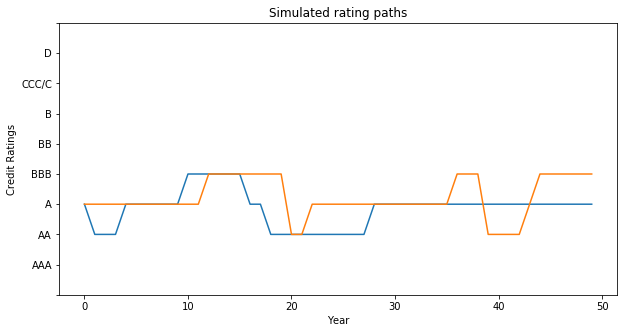

In [938]:
### Complement the plot commands accordingly and plot your results

plt.figure( figsize=( 10, 5 ) )

plt.title('Simulated rating paths')

plt.ylabel('Credit Ratings')
plt.xlabel('Year')

plt.ylim( -1, 8 )
ratings = [ '', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D', '' ]
plt.yticks( range( -1, 9 ), ratings )

for i in range(numPaths):
    plt.plot(paths[i])

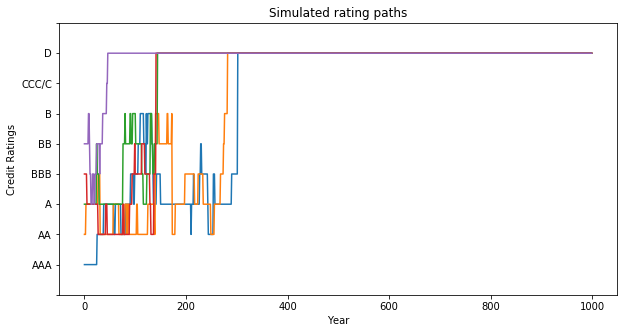

In [939]:
### Problem 4 

# Can you say something about the long run behavior of the Markov chain? 
# Does it depend on today's starting rate at time 0?
''' In the long run, the Markov chain, regardless of its initial state, will 
eventually settle down to an equilibrium distribution. For the case of credit 
ratings, the long run behavior of the Markov chain does not depend on today's 
starting rate at time 0. Since the transition of credit ratings are determined 
by a randomized process, characterized by a finite state space and transition 
probabilities, there is a chance for every company to reach the default state. 
Once a company reaches the default state, then by the absorbing state, they 
will remain at default forever. We can model this as taking the limit of the 
transition matrix P to power of n years. As n approaches infinity, we get that 
lim P^n --> default by the absorbing state. Therefore, eventually over a long period, 
every company's credit rating will reach the default state. This can be modelled by 
plotting several large paths of the same size with different starting values. '''

lengthPath = 1000
numPaths = 5

paths = []
creditRating = [0,1,2,3,4,5,6,7]
for i in range(numPaths):
    paths_i = []
    currentRating = i
    paths_i.append(currentRating)
    for j in range(1, lengthPath):  
        path = np.random.choice(creditRating, 1, p = P[currentRating][:])
        paths_i.append(path[0])
        currentRating = path[0]
    paths.append(paths_i) 
    
plt.figure( figsize=( 10, 5 ) )

plt.title('Simulated rating paths')

plt.ylabel('Credit Ratings')
plt.xlabel('Year')

plt.ylim( -1, 8 )
ratings = [ '', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D', '' ]
plt.yticks( range( -1, 9 ), ratings )

for i in range(numPaths):
    plt.plot(paths[i])